## Лабораторная работа №1

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import pylab

## 1. Осуществить моделирование $n = 1000$ реализаций случайной величины из нормального закона распределения $N(m, s^2)$ с заданными параметрами:  $m = 2, s^2 = 16$.

### Краткая теория*
#### Среднее — среднее арифметическое значение по выборке.
#### Максимум и минимум — соответсвенно максимальное и минимальное значение в выборке. 
#### Стандартное отклонение — показатель рассеивания значений случайной величины относительно её математического ожидания. Есть квадратный корень из дисперсии.
#### Медиана — число, которое является серединой множества чисел выборки. То есть в нашем случае при _n = 1000_  - это среднее арифметическое двух чисел в середине, при этом выборка должна быть упорядочена. Также медиана является вторым квартилем выборки.
#### Квартиль — значение, ниже которого лежит часть распределения вероятностей случайной величины, кратная одной четвёртой.
#### Мода — значение, встречаемое в выборке наиболее часто. Так как в нашей выборке все элементы различны, то соответсвующая функция для её поиска возвращает минимальный элемент выборки (либо же первый).
#### Асимметрия характеризует ассиметричность выборки, то есть коэффициент асимметрии положителен, если правый хвост распределения длиннее левого, и отрицателен в противном случае.
#### Эксцесс — мера остроты пика распределения случайной величины.
#### Гистогрaмма  — это функция, приближающая плотность вероятности некоторого распределения, построенная на основе выборки из него.
#### «Ящик с усами» — график, компактно изображающий одномерное распределение вероятностей. Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы.
#### «Квантиль-квантиль» — график, позволяющий сравнить рапределение исследуемой переменной с теоретическим нормальным распределением.
#### * Больше неформальная. 

In [28]:
norm = np.random.normal(2, 4, 1000)

### Числовые характеристики:

In [29]:
data = {'Среднее': [np.mean(norm)],
        'Максимум': [np.max(norm)],
        'Минимум': [np.min(norm)],
        'Стандартное отклонение': [np.std(norm)],
        'Медиана': [np.median(norm)],
        'Первая квартиль': [np.percentile(norm, 25)],
        'Третья квартиль': [np.percentile(norm, 75)],
        'Межквартильный размах': [np.percentile(norm, 75) - np.percentile(norm, 25)],
        'Мода': [st.mode(norm)],
        'Асимметрия': [st.skew(norm)],
        'Эксцесс': [st.kurtosis(norm)]}
df = pd.DataFrame(data,
                  columns =['Среднее', 'Максимум', 'Минимум', 'Стандартное отклонение', 
                            'Медиана', 'Первая квартиль','Третья квартиль','Межквартильный размах', 'Мода', 'Асимметрия', 'Эксцесс'])
df

,Среднее,Максимум,Минимум,Стандартное отклонение,Медиана,Первая квартиль,Третья квартиль,Межквартильный размах,Мода,Асимметрия,Эксцесс
0,1.931976,13.069437,-10.483241,3.880331,1.883614,-0.760654,4.482823,5.243477,"([-10.48324071597374], [1])",0.01724,-0.230852


### Гистограмма:

C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Нормальное распределение: m=2, s^2=16')

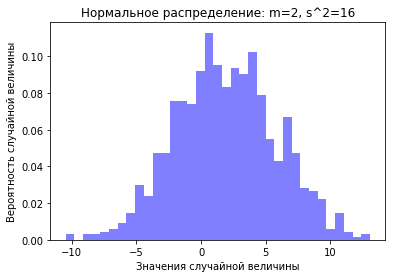

In [30]:
bins = plt.hist(norm, 35, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel('Значения случайной величины')
plt.ylabel('Вероятность случайной величины')
plt.title(r'Нормальное распределение: m=2, s^2=16')

### «Ящик с усами»:

Text(0,0.5,'Значения случайной величины')

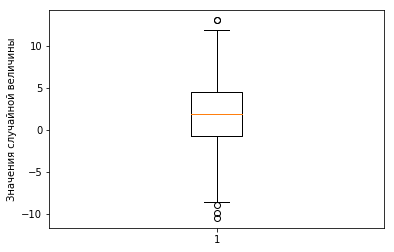

In [31]:
plt.boxplot(norm)
plt.ylabel('Значения случайной величины')

### Квантиль-квантиль:

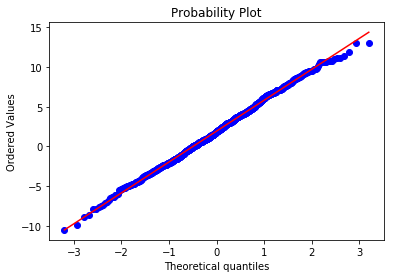

In [32]:
st.probplot(norm, dist="norm", plot=pylab)
pylab.show()

### Критерий Колмогорова-Смирнова:

In [33]:
st.kstest(norm, 'norm', args=(2, 4))

KstestResult(statistic=0.024893900658062518, pvalue=0.5650782757512247)

### Критерий Пирсона:


In [34]:
norm_test = np.random.normal(2, 16, 1000)
st.pearsonr(norm, norm_test)

(-0.029733692378943244, 0.34758003170725327)

## 2. Смоделировать $n = 1000$ случайных величин из заданных абсолютно непрерывных распределений согласно варианту: Логнормальное $LN(m, s^2), m = -1, s^2 = 1$


In [9]:
lognorm = np.random.lognormal(-1, 1, 1000)

### Числовые характеристики:

In [35]:
data = {'Среднее': [np.mean(lognorm)],
        'Максимум': [np.max(lognorm)],
        'Минимум': [np.min(lognorm)],
        'Стандартное отклонение': [np.std(lognorm)],
        'Медиана': [np.median(lognorm)],
        'Первая квартиль': [np.percentile(lognorm, 25)],
        'Третья квартиль': [np.percentile(lognorm, 75)],
        'Межквартильный размах': [np.percentile(lognorm, 75) - np.percentile(lognorm, 25)],
        'Мода': [st.mode(lognorm)],
        'Асимметрия': [st.skew(lognorm)],
        'Эксцесс': [st.kurtosis(lognorm)]}
df = pd.DataFrame(data,
                  columns =['Среднее', 'Максимум', 'Минимум', 'Стандартное отклонение', 
                            'Медиана', 'Первая квартиль','Третья квартиль','Межквартильный размах', 'Мода', 'Асимметрия', 'Эксцесс'])
df

,Среднее,Максимум,Минимум,Стандартное отклонение,Медиана,Первая квартиль,Третья квартиль,Межквартильный размах,Мода,Асимметрия,Эксцесс
0,0.631203,6.402928,0.01174,0.750139,0.376923,0.195275,0.78131,0.586035,"([0.011740496945035938], [1])",3.289844,15.239579


### Гистограмма:

C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Логнормальное распределение: m=-1, s^2=1')

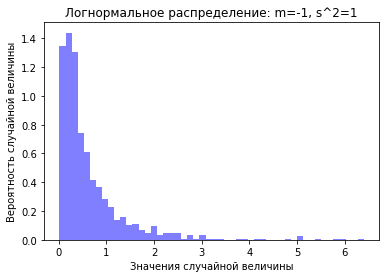

In [36]:
bins = plt.hist(lognorm, 50, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel('Значения случайной величины')
plt.ylabel('Вероятность случайной величины')
plt.title('Логнормальное распределение: m=-1, s^2=1')

### «Ящик с усами»:

Text(0,0.5,'Значения случайной величины')

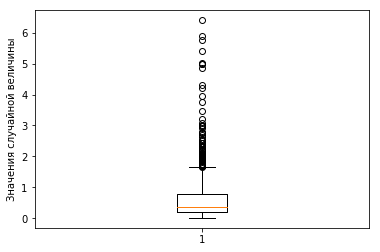

In [37]:
plt.boxplot(lognorm)
plt.ylabel('Значения случайной величины')

### Квантиль-квантиль:

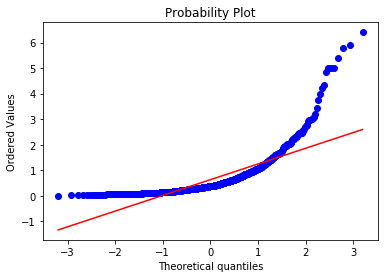

In [38]:
st.probplot(lognorm, dist="norm", plot=pylab)
pylab.show()

### Критерий Колмогорова-Смирнова:

In [39]:
st.kstest(lognorm, 'lognorm', args = (-1, 1))

C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


KstestResult(statistic=nan, pvalue=nan)

### Критерий Пирсона:

In [40]:
test = np.random.lognormal(2, 4, 1000)
st.pearsonr(lognorm, test)

(-0.019620660712078162, 0.5354267331498583)

## 3. Смоделировать выборку с засорениями объемом _n = 1000_ случайных величин. В качестве основного распределения взять нормальное распределение из задания 1.1, а засоряющего – распределение из задания 1.2 (Логнормально). Использовать уровень засорения 5% (доля засоряющих значений в выборке)

In [41]:
selection = np.random.normal(2,4,950)

In [42]:
clog = np.random.lognormal(-1,1,50)

In [43]:
norm_with_clog = np.concatenate([selection, clog])

### Числовые характеристики:

In [44]:
data = {'Среднее': [np.mean(norm_with_clog)],
        'Максимум': [np.max(norm_with_clog)],
        'Минимум': [np.min(norm_with_clog)],
        'Стандартное отклонение': [np.std(norm_with_clog)],
        'Медиана': [np.median(norm_with_clog)],
        'Первая квартиль': [np.percentile(norm_with_clog, 25)],
        'Третья квартиль': [np.percentile(norm_with_clog, 75)],
        'Межквартильный размах': [np.percentile(norm_with_clog, 75) - np.percentile(norm_with_clog, 25)],
        'Мода': [st.mode(norm_with_clog)],
        'Асимметрия': [st.skew(norm_with_clog)],
        'Эксцесс': [st.kurtosis(norm_with_clog)]}
df = pd.DataFrame(data,
                  columns =['Среднее', 'Максимум', 'Минимум', 'Стандартное отклонение', 
                            'Медиана', 'Первая квартиль','Третья квартиль','Межквартильный размах', 'Мода', 'Асимметрия', 'Эксцесс'])
df

,Среднее,Максимум,Минимум,Стандартное отклонение,Медиана,Первая квартиль,Третья квартиль,Межквартильный размах,Мода,Асимметрия,Эксцесс
0,1.789155,14.195223,-10.404383,3.98097,1.617475,-0.907493,4.643638,5.551131,"([-10.40438266614109], [1])",-0.007746,-0.265812


C:\Users\Glowzer-PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Нормальное распределение с засорениями: m=2, s^2=16')

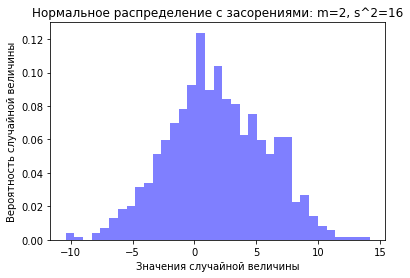

In [45]:
bins = plt.hist(norm_with_clog, 35, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel('Значения случайной величины')
plt.ylabel('Вероятность случайной величины')
plt.title('Нормальное распределение с засорениями: m=2, s^2=16')

### «Ящик с усами»: 


Text(0,0.5,'Значения случайной величины')

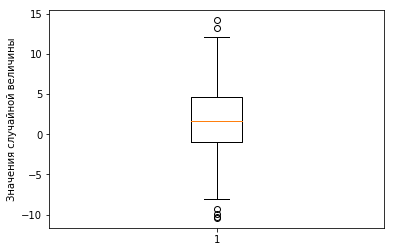

In [46]:
plt.boxplot(norm_with_clog)
plt.ylabel('Значения случайной величины')

### Квантиль-квантиль: 


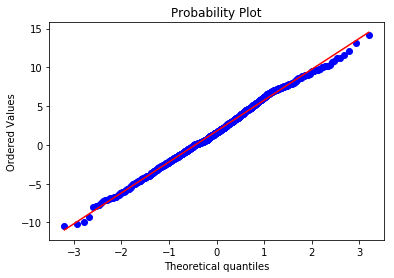

In [47]:
st.probplot(norm_with_clog, dist="norm", plot=pylab)
pylab.show()

In [48]:
st.kstest(norm_with_clog, 'norm', args=(2, 4))

KstestResult(statistic=0.05044034036135453, pvalue=0.01190606586476628)